In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

stocks = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/stocks.csv", delimiter=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


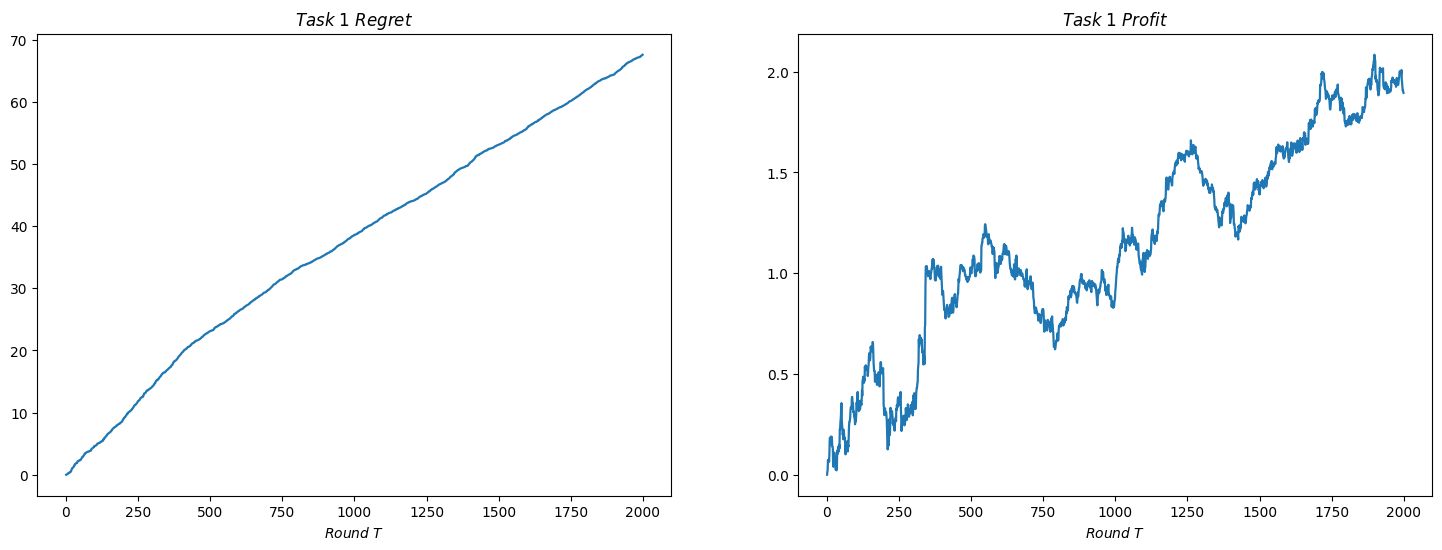

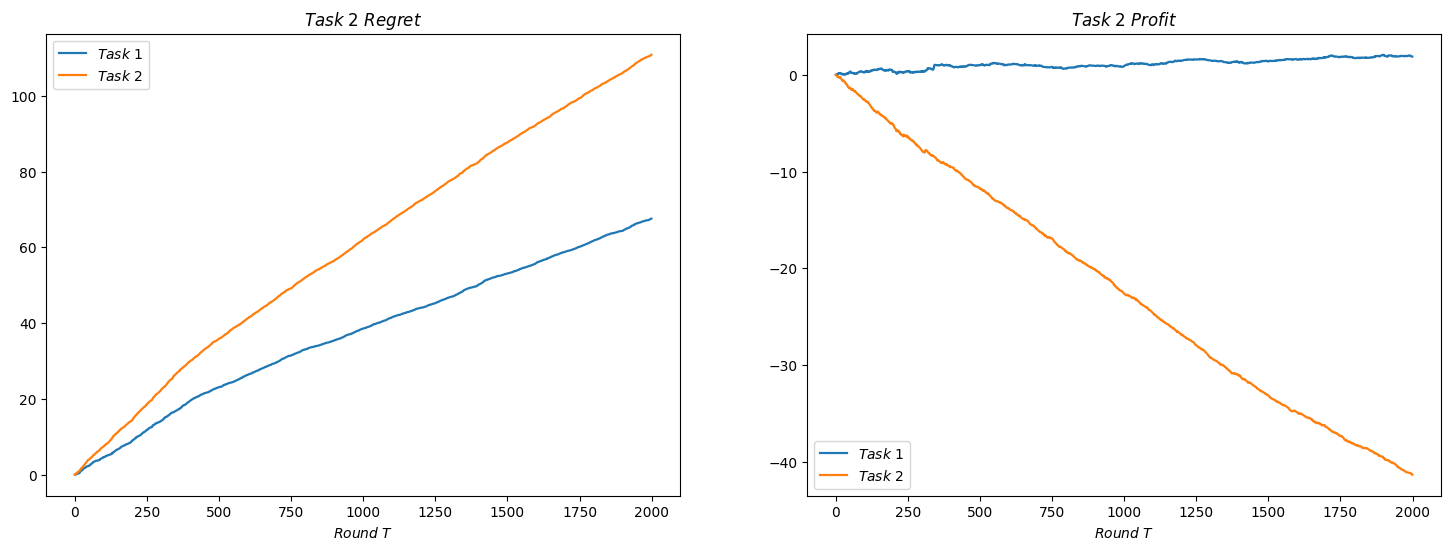

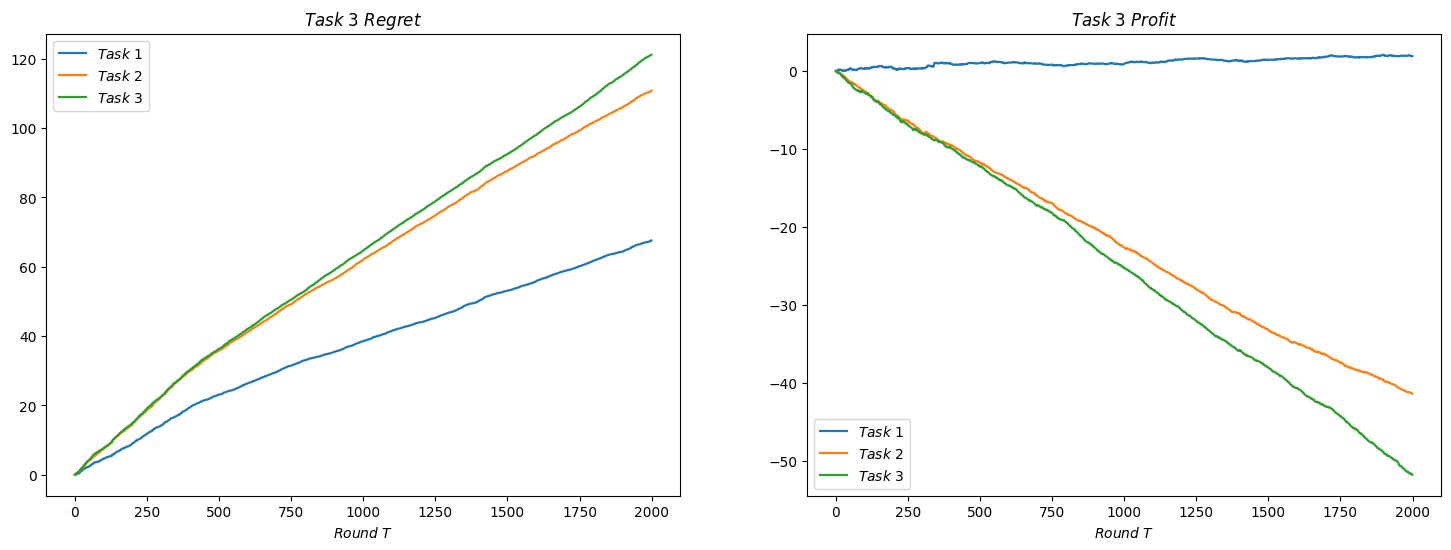

In [19]:
cum_regret_task1 = []
cum_regret_task2 = []

cum_profit_task1 = []
cum_profit_task2 = []

def multiplicative_weights_algorithm(SP):

    # Global variables
    global cum_regret_task1
    global cum_profit_task1

    # Parameter initialzation
    T = len(SP)                   # time horizon
    k = len(SP[0])                # num of experts
    w = np.ones((k,))             # weights
    P = np.zeros((k,))            # probabilities
    eta = np.sqrt(np.log(k)/T)    # algorithm hyper-parameter

    regret = np.zeros((T,))       # regret per round
    round_profit = np.zeros((T,)) # profit per round
    round_loss = np.zeros((T,))   # loss per round

    for t in range(T):
        P = np.divide(w, np.sum(w))         # compute expert probabilities
        i = np.random.choice(k, p=P)        # choose expert

        round_profit[t] = SP[t][i]
        round_loss[t] = -round_profit[t]

        best_choice = np.max(SP[t])
        regret[t] = best_choice - round_profit[t]

        # Update every weight given every stock price per day
        for j in range(k):
            if(SP[t][j] < 0):
                w[j] = np.multiply(np.power(1-eta,-SP[t][j]), w[j])

    cum_regret = [np.sum(regret[0:t]) for t in range(T)]
    cum_profit = [np.sum(round_profit[0:t]) for t in range(T)]

    plt.figure(figsize=(18,6))
    plt.subplot(1, 2, 1)
    plt.title("$Task$ $1$ $Regret$")
    plt.xlabel("$Round$ $T$")
    plt.plot(np.arange(1,T+1), cum_regret, linewidth = 1.6)
    plt.subplot(1, 2, 2)
    plt.title("$Task$ $1$ $Profit$")
    plt.xlabel("$Round$ $T$")
    plt.plot(np.arange(1,T+1), cum_profit, linewidth = 1.6)
    plt.show()

    cum_regret_task1 = cum_regret
    cum_profit_task1 = cum_profit



def multiplicative_weights_transcost(SP):

    # Global variables
    global cum_regret_task2
    global cum_profit_task2

    # Parameter initialzation
    T = len(SP)
    k = len(SP[0])                # num of experts
    w = np.ones((k,))             # weights
    P = np.zeros((k,))            # probabilities
    eta = np.sqrt(np.log(k)/T)

    # Define the transaction cost per investment
    transaction_fee = np.array([0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05])

    regret = np.zeros((T,))
    round_profit = np.zeros((T,))
    round_loss = np.zeros((T,))   # loss per round

    for t in range(T):
        P = np.divide(w, np.sum(w))
        i = np.random.choice(k, p=P)

        round_profit[t] = SP[t][i] - transaction_fee[i]   # the profit decreases due to investment cost
        round_loss[t] = -round_profit[t]

        best_choice = np.max(SP[t])
        regret[t] = best_choice - round_profit[t]

        for j in range(k):
            if(SP[t][j] - transaction_fee[j]< 0):
                w[j] = np.multiply(np.power(1-eta,-SP[t][j] + transaction_fee[j]), w[j])

    cum_regret = [np.sum(regret[0:t]) for t in range(T)]
    cum_profit = [np.sum(round_profit[0:t]) for t in range(T)]

    plt.figure(figsize=(18,6))
    plt.subplot(1, 2, 1)
    plt.title("$Task$ $2$ $Regret$")
    plt.xlabel("$Round$ $T$")
    plt.plot(np.arange(1,T+1), cum_regret_task1, linewidth = 1.6)
    plt.plot(np.arange(1,T+1), cum_regret, linewidth = 1.6)
    plt.legend(["$Task$ $1$", "$Task$ $2$"])
    plt.subplot(1, 2, 2)
    plt.title("$Task$ $2$ $Profit$")
    plt.xlabel("$Round$ $T$")
    plt.plot(np.arange(1,T+1), cum_profit_task1, linewidth = 1.6)
    plt.plot(np.arange(1,T+1), cum_profit, linewidth = 1.6)
    plt.legend(["$Task$ $1$", "$Task$ $2$"])
    plt.show()

    cum_regret_task2 = cum_regret
    cum_profit_task2 = cum_profit


def multiplicative_weights_bandits(SP):

    # Parameter initialzation
    T = len(SP)
    k = len(SP[0])                # num of experts
    w = np.ones((k,))             # weights
    P = np.zeros((k,))            # probabilities
    eta = np.sqrt(np.log(k)/T)

    epsilon = 0.7

    transaction_fee = np.array([0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05])

    regret = np.zeros((T,))
    round_profit = np.zeros((T,))
    round_loss = np.zeros((T,))   # loss per round

    for t in range(T):
        P = np.divide(w, np.sum(w))
        q = np.add(np.multiply(1-epsilon, P), epsilon/k)
        i = np.random.choice(k, p=q)

        round_profit[t] = SP[t][i] - transaction_fee[i]
        round_loss[t] = -round_profit[t]

        best_choice = np.max(SP[t])
        regret[t] = best_choice - round_profit[t]

        if(SP[t][i] - transaction_fee[i]< 0):
            w[i] = np.multiply(np.power(1-eta,-SP[t][i] + transaction_fee[i]), w[i])

    cum_regret = [np.sum(regret[0:t]) for t in range(T)]
    cum_profit = [np.sum(round_profit[0:t]) for t in range(T)]

    plt.figure(figsize=(18,6))
    plt.subplot(1, 2, 1)
    plt.title("$Task$ $3$ $Regret$")
    plt.xlabel("$Round$ $T$")
    plt.plot(np.arange(1,T+1), cum_regret_task1, linewidth = 1.6)
    plt.plot(np.arange(1,T+1), cum_regret_task2, linewidth = 1.6)
    plt.plot(np.arange(1,T+1), cum_regret, linewidth = 1.6)
    plt.legend(["$Task$ $1$", "$Task$ $2$", "$Task$ $3$"])
    plt.subplot(1, 2, 2)
    plt.title("$Task$ $3$ $Profit$")
    plt.xlabel("$Round$ $T$")
    plt.plot(np.arange(1,T+1), cum_profit_task1, linewidth = 1.6)
    plt.plot(np.arange(1,T+1), cum_profit_task2, linewidth = 1.6)
    plt.plot(np.arange(1,T+1), cum_profit, linewidth = 1.6)
    plt.legend(["$Task$ $1$", "$Task$ $2$", "$Task$ $3$"])
    plt.show()





if __name__ == '__main__':
    multiplicative_weights_algorithm(stocks)
    multiplicative_weights_transcost(stocks)
    multiplicative_weights_bandits(stocks)